In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


# KEGG Ratios

- Compute the median KEGG for each HE, LS, CD, and UC cohort
- Compute the ratio of the median KEGG for LS, CD, and UC against HE
- Viusalize ratios
- Visualize only "extreme" ratios

In [2]:
df = pd.read_csv("../data/keggs-subjects-rf-scores.csv")

In [3]:
df.columns

Index([u'kegg', u'over.abundant.health.conf', u'LS001', u'LS002', u'LS003',
       u'LS004', u'LS005', u'LS006', u'LS007', u'CD.SRS301865',
       u'CD.SRS301866', u'CD.SRS301867', u'CD.SRS301868', u'CD.SRS301869',
       u'CD.SRS301870', u'CD.SRS301871', u'CD.SRS301872', u'CD.SRS301873',
       u'CD.SRS301874', u'CD.SRS301875', u'CD.SRS301876', u'CD.SRS301877',
       u'CD.SRS301878', u'CD.SRS301879', u'UC.SRS071964', u'UC.SRS071970',
       u'UC.SRS071978', u'UC.SRS071981', u'UC.SRS071982', u'UC.SRS071988',
       u'HE.SRS011061', u'HE.SRS011084', u'HE.SRS011134', u'HE.SRS011239',
       u'HE.SRS011271', u'HE.SRS011302', u'HE.SRS011405', u'HE.SRS011452',
       u'HE.SRS011529', u'HE.SRS011586', u'HE.SRS012273', u'HE.SRS012902',
       u'HE.SRS013158', u'HE.SRS013215', u'HE.SRS013687', u'HE.SRS013951',
       u'HE.SRS014235', u'HE.SRS014923', u'HE.SRS014979', u'HE.SRS015065',
       u'HE.SRS015217', u'HE.SRS015578', u'HE.SRS015663', u'HE.SRS016018',
       u'HE.SRS016095', u'HE.SRS016

In [4]:
class RatioComputer():
    ''' Compute average ratios between three different cohorts (UC, CD, LS) against HE. Compute the 
    condition number 
    
    
    Args:
    -----
    df_subjects : pandas data frame
        Data frame where we expect rows to be KEGGs with columns corresponding to the 
        cohorts HE, LS, CD, and UC. We expect the strings "HE", "LS", "CD", and "UC" 
        to be in the  header names.
    
    random_cohort : binary (default False)
        Whether the cohorts should be randomized. Useful for hypothesis testing. If random 
        cohorts are used, then 35, 6, 7, and 15 columns are randomly sampled without 
        replacement correspondings to the cohorts, HE, LS, UC, and CD respectively. These
        numbers reflect the sample sizes for each cohort. 
        
    
    Attributes:
    -----------
    HE_df, LS_df, UC_df, CD_df : pandas data frames
        Pandas datafames corresponding to subject samples used for HE, LS, UC, and CD cohorts.
        
    df_subjects : pandas data frame
        Subjects data frame passed that remains untouched even random_cohort = True
    
    random_cohort : binary (default True)
        If random samples where used to create HE_df, LS_df, UC_df, and CD_df. 
        
        
    Example:
    --------
    >>> # read data
    >>> df = pd.read_csv("../data/keggs-subjects-rf-scores.csv")
    >>> mean_ratios = RatioComputer(df_subjects = df.iloc[:,2:])
    >>> mean_ratios.mean_ratios_cond_number(laplace_scale_numerator=False)

    
    '''
    def __init__(self, df_subjects, random_cohort = False):
        self.df_subjects = df_subjects
        self.random_cohort = random_cohort
        
        if self.random_cohort:
            df_random = df_subjects.iloc[:,np.random.permutation(np.arange(df_subjects.shape[1]))]
            self.HE_df = df_random.iloc[:,:35]
            self.LS_df = df_random.iloc[:,35:(35+7)]
            self.UC_df = df_random.iloc[:,(35+7):(35+7+6)]
            self.CD_df = df_random.iloc[:,(35+7+6):]
            
        else:
            self.HE_df = df_subjects.filter(regex=("HE.*"))
            self.LS_df = df_subjects.filter(regex=("LS.*"))
            self.UC_df = df_subjects.filter(regex=("UC.*"))
            self.CD_df = df_subjects.filter(regex=("CD.*"))
            
            
    def return_eig_vals(self):
        self.ratio_matrix_finite = self.ratio_matrix[:,np.all(np.isfinite(self.ratio_matrix), 
                                                              axis=0)]      
        self.ratio_matrix_cov = np.cov(self.ratio_matrix_finite)
        w, v = np.linalg.eig(self.ratio_matrix_cov)  
        return w    
    
    
    def mean_ratios_cond_number(self, laplace_scale = 1e-9, normalize = False, laplace_scale_numerator = True):
        ''' compute mean KEGG for each KEGG for each cohort, then take the log-ratio of the average KEGG for cohorts 
        LS, CD, and UC against HE to yeild the tuple (LS/HE, UC/HE, CD/HE). Can think of this tuple as a matrix with
        3 columns corresponding to the 3 ratios and ~10K rows corresponding to each KEGG. 
        We compute the condition number for 3x3 covariance matrix formed by this tuple. 
        
        
        Args:
        -----
        laplace_scale : float (default 1e-9)
            What value to add to ALL KEGGs to avoid division by 0 and log(0) issues.
        
        normalize : binary (default False)
            Whether the relative abundances should be normalized to each that all KEGGs
            add to 1.0 after averaging has been computed. 
        
        '''
        
        self.HE_df = self.HE_df + laplace_scale
        self.LS_df = self.LS_df + laplace_scale
        self.UC_df = self.UC_df + laplace_scale
        self.CD_df = self.CD_df + laplace_scale
        
        if normalize_after_laplace_scaling:
            
            
        
        HE_mean = self.HE_df.apply(lambda x: np.nanmean(np.log10(x+laplace_scale))**10, 
                                   axis = 1)
        LS_mean = self.LS_df.apply(lambda x: np.nanmean(np.log10(x+laplace_scale))**10, 
                                   axis = 1)
        UC_mean = self.UC_df.apply(lambda x: np.nanmean(np.log10(x+laplace_scale))**10, 
                                   axis = 1)
        CD_mean = self.CD_df.apply(lambda x: np.nanmean(np.log10(x+laplace_scale))**10, 
                                   axis = 1)
        
        if normalize:
            HE_mean = HE_mean/np.nansum(HE_mean)
            LS_mean = LS_mean/np.nansum(LS_mean)
            CD_mean = CD_mean/np.nansum(CD_mean)
            UC_mean = UC_mean/np.nansum(UC_mean)
            
        if laplace_scale_numerator:    
            self.LS_HE_mean = np.log10((LS_mean+laplace_scale)/(HE_mean+laplace_scale))
            self.UC_HE_mean = np.log10((UC_mean+laplace_scale)/(HE_mean+laplace_scale))
            self.CD_HE_mean = np.log10((CD_mean+laplace_scale)/(HE_mean+laplace_scale))
        else:
            self.LS_HE_mean = np.log10((LS_mean)/(HE_mean+laplace_scale))
            self.UC_HE_mean = np.log10((UC_mean)/(HE_mean+laplace_scale))
            self.CD_HE_mean = np.log10((CD_mean)/(HE_mean+laplace_scale))
            
        self.ratio_matrix = np.array([self.LS_HE_mean, self.UC_HE_mean, self.CD_HE_mean])
        
        w = self.return_eig_vals()
        self.cond_number = np.max(w)/np.min(w) 
        return self.cond_number   

    def median_ratios_cond_number(self, laplace_scale = 1e-9, normalize = False, laplace_scale_numerator = True):
        HE_median = self.HE_df.apply(lambda x: np.median(x), axis = 1)
        LS_median = self.LS_df.apply(lambda x: np.median(x), axis = 1)
        UC_median = self.UC_df.apply(lambda x: np.median(x), axis = 1)
        CD_median = self.CD_df.apply(lambda x: np.median(x), axis = 1)
        
        if normalize:
            HE_median = HE_median/np.sum(HE_median)
            LS_median = LS_median/np.sum(LS_median)
            CD_median = CD_median/np.sum(CD_median)
            UC_median = UC_median/np.sum(UC_median)
        
        if laplace_scale_numerator:
            self.LS_HE_median = np.log10((LS_median+laplace_scale)/(HE_median+laplace_scale))
            self.UC_HE_median = np.log10((UC_median+laplace_scale)/(HE_median+laplace_scale))
            self.CD_HE_median = np.log10((CD_median+laplace_scale)/(HE_median+laplace_scale))
        else:
            self.LS_HE_median = np.log10((LS_median)/(HE_median+laplace_scale))
            self.UC_HE_median = np.log10((UC_median)/(HE_median+laplace_scale))
            self.CD_HE_median = np.log10((CD_median)/(HE_median+laplace_scale))            
            
        self.ratio_matrix = np.array([self.LS_HE_median, self.UC_HE_median, self.CD_HE_median])  
        
        w = self.return_eig_vals()
        self.cond_number = np.max(w)/np.min(w)  
        return self.cond_number
        


In [5]:
mean_ratios = RatioComputer(df_subjects = df.iloc[:,2:])
mean_ratios.mean_ratios_cond_number(laplace_scale_numerator=False)

3.7347151850428517

In [20]:
meh = mean_ratios.HE_df

In [21]:
meh = meh + 1e-9

In [22]:
meh_normalized = meh/meh.sum()

In [27]:
np.sum(meh_normalized.iloc[:,0]/np.sum(meh_normalized.iloc[:,0]))

1.0

In [29]:
meh_normalized = meh.apply(lambda x: x/np.sum(x), axis = 0)

In [30]:
np.sum(meh_normalized.iloc[:,0])

1.0

CPU times: user 17min 2s, sys: 20.7 s, total: 17min 22s
Wall time: 16min 26s


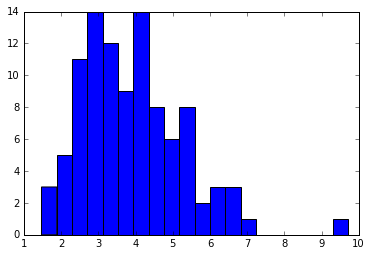

In [7]:
%%time
cond_numbers = []
for _ in range(100):
    mean_random_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=True)
    cond_numbers.append(mean_random_ratios.mean_ratios_cond_number(laplace_scale_numerator=False))
    
plt.hist(cond_numbers, bins=20);

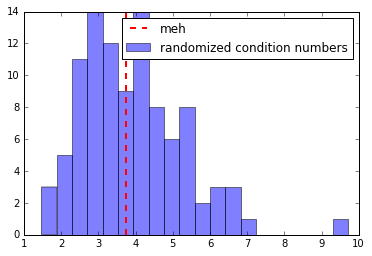

In [37]:
width 
height = 
plt.hist(cond_numbers, bins=20, alpha = .5, label = "randomized condition numbers");
plt.axvline(3.7347151850428517,  color='r', linestyle='dashed', linewidth=2, label = "meh")
plt.legend()

In [11]:
median_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=False)
median_ratios.median_ratios_cond_number(laplace_scale_numerator=False)

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:76: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:77: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:78: RuntimeWarning: divide by zero encountered in log10


38.778113886694292

In [17]:
cond_numbers = []
stats_models = []
for _ in range(100):
    median_random_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=True)
    cond_numbers.append(median_random_ratios.median_ratios_cond_number(laplace_scale_numerator=False))
    stats_models.append(median_random_ratios)

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:76: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:77: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:78: RuntimeWarning: divide by zero encountered in log10


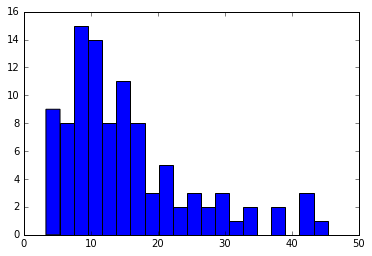

In [19]:
plt.hist(cond_numbers, bins=20);

In [63]:
len(np.where(np.array(cond_numbers) > 38)[0])

4

In [65]:
mean_ratios = RatioComputer(df_subjects = df.iloc[:,2:])
mean_ratios.mean_ratios_cond_number(laplace_scale_numerator=True)

3.7347151850428562

In [68]:
mean_ratios = RatioComputer(df_subjects = df.iloc[:,2:])
mean_ratios.mean_ratios_cond_number(laplace_scale_numerator=True, laplace_scale=0)

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:29: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:45: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:46: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:47: RuntimeWarning: divide by zero encountered in log10


11.652880940699854

In [ ]:
cond_numbers = []
stats_models = []
for _ in range(100):
    mean_random_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=True)
    cond_numbers.append(mean_random_ratios.mean_ratios_cond_number(laplace_scale_numerator=True, laplace_scale=0))
    stats_models.append(mean_random_ratios)

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:29: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:35: RuntimeWarning: divide by zero encountered in log10


In [18]:
mean_ratios = RatioComputer(df_subjects = df.iloc[:,2:])
mean_ratios.mean_ratios()
mean_ratios.condition_number(laplace_scale=0)

3.7347151850428562

In [19]:
mean_ratios = RatioComputer(df_subjects = df.iloc[:,2:])
mean_ratios.mean_ratios(normalize=True)
mean_ratios.condition_number(laplace_scale=0)

3.731855659041428

In [20]:
mean_ratios = RatioComputer(df_subjects = df.iloc[:,2:])
mean_ratios.mean_ratios(laplace_scale=0)
mean_ratios.condition_number(laplace_scale=0)

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:36: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:37: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:38: RuntimeWarning: divide by zero encountered in log10


11.652880940699854

In [23]:
median_ratios = RatioComputer(df_subjects = df.iloc[:,2:])
median_ratios.median_ratios()
median_ratios.condition_number()

3.3827740316100026

In [24]:
median_ratios = RatioComputer(df_subjects = df.iloc[:,2:])
median_ratios.median_ratios()
median_ratios.condition_number(laplace_scale=0)

3.3827740316100026

In [25]:
median_ratios = RatioComputer(df_subjects = df.iloc[:,2:])
median_ratios.median_ratios(laplace_scale=0)
median_ratios.condition_number(laplace_scale=0)

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:53: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:54: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:55: RuntimeWarning: divide by zero encountered in log10


10.377479279340005

In [26]:
median_ratios = RatioComputer(df_subjects = df.iloc[:,2:])
median_ratios.median_ratios(normalize=True)
median_ratios.condition_number()

3.3970395852869375

In [28]:
median_ratios = RatioComputer(df_subjects = df.iloc[:,2:])
median_ratios.median_ratios(normalize=True, laplace_scale=0)
median_ratios.condition_number(laplace_scale=0)

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:53: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:54: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:55: RuntimeWarning: divide by zero encountered in log10


10.377479279340005

In [39]:
cond_numbers = []
for _ in range(100):
    mean_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=True)
    mean_ratios.mean_ratios(laplace_scale=0)
    cond_numbers.append(mean_ratios.condition_number(laplace_scale=0))

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:36: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:37: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:38: RuntimeWarning: divide by zero encountered in log10


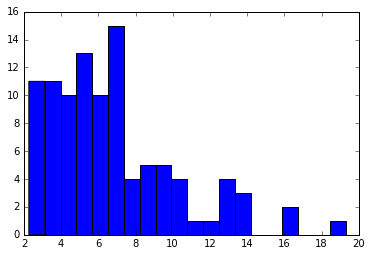

In [42]:
plt.hist(cond_numbers, bins=20);

In [43]:
mean_ratios = RatioComputer(df_subjects = df.iloc[:,2:])
mean_ratios.mean_ratios(laplace_scale=0)
mean_ratios.condition_number(laplace_scale=0)

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:36: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:37: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:38: RuntimeWarning: divide by zero encountered in log10


11.652880940699854

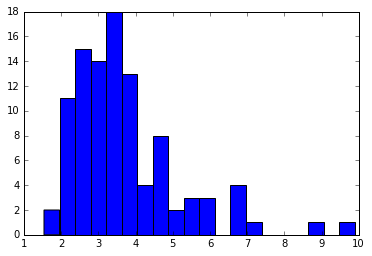

In [44]:
cond_numbers = []
for _ in range(100):
    mean_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=True)
    mean_ratios.mean_ratios()
    cond_numbers.append(mean_ratios.condition_number())
    
plt.hist(cond_numbers, bins=20);

In [46]:
mean_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=False)
mean_ratios.mean_ratios()
mean_ratios.condition_number()

3.7347151850428562

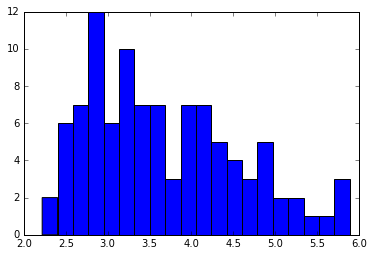

In [47]:
cond_numbers = []
for _ in range(100):
    median_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=True)
    median_ratios.median_ratios()
    cond_numbers.append(median_ratios.condition_number())
    
plt.hist(cond_numbers, bins=20);

In [48]:
median_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=False)
median_ratios.median_ratios()
median_ratios.condition_number()

3.3827740316100026

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:53: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:54: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:55: RuntimeWarning: divide by zero encountered in log10


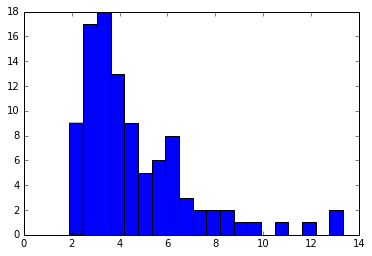

In [49]:
cond_numbers = []
for _ in range(100):
    median_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=True)
    median_ratios.median_ratios(laplace_scale=0)
    cond_numbers.append(median_ratios.condition_number(laplace_scale=0))
    
plt.hist(cond_numbers, bins=20);

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:58: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:59: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:60: RuntimeWarning: divide by zero encountered in log10


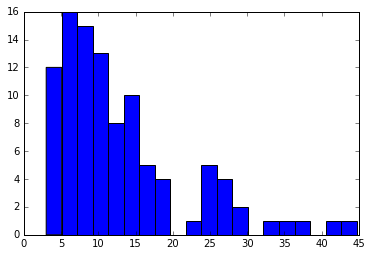

In [59]:
cond_numbers = []
for _ in range(100):
    median_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=True)
    median_ratios.median_ratios(laplace_scale_numerator=False)
    cond_numbers.append(median_ratios.condition_number())
    
plt.hist(cond_numbers, bins=20);

In [60]:
median_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=False)
median_ratios.median_ratios(laplace_scale_numerator=False)
median_ratios.condition_number()

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:58: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:59: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:60: RuntimeWarning: divide by zero encountered in log10


38.778113886694292

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:58: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:59: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:60: RuntimeWarning: divide by zero encountered in log10


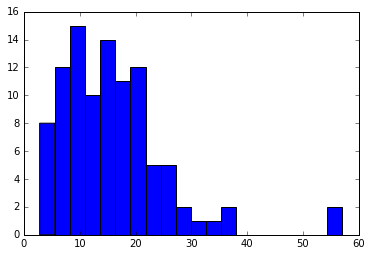

In [62]:
cond_numbers = []
for _ in range(100):
    median_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=True)
    median_ratios.median_ratios(laplace_scale_numerator=False, normalize=True)
    cond_numbers.append(median_ratios.condition_number())
    
plt.hist(cond_numbers, bins=20);

In [61]:
median_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=False)
median_ratios.median_ratios(laplace_scale_numerator=False, normalize=True)
median_ratios.condition_number()

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:58: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:59: RuntimeWarning: divide by zero encountered in log10
/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:60: RuntimeWarning: divide by zero encountered in log10


39.491768910285295

In [ ]:
cond_numbers = []
for _ in range(100):
    median_ratios = RatioComputer(df_subjects = df.iloc[:,2:], random_cohort=True)
    median_ratios.median_ratios(laplace_scale=0, laplace_scale_num)
    cond_numbers.append(median_ratios.condition_number(laplace_scale=0))
    
plt.hist(cond_numbers, bins=20);


In [7]:
HE_df = df.filter(regex=("HE.*"))
LS_df = df.filter(regex=("LS.*"))
UC_df = df.filter(regex=("UC.*"))
CD_df = df.filter(regex=("CD.*"))

print(HE_df.shape)
print(LS_df.shape)
print(UC_df.shape)
print(CD_df.shape)

(10012, 35)
(10012, 7)
(10012, 6)
(10012, 15)


In [8]:
df.columns.isin("HE")

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [9]:
df.columns

Index([u'kegg', u'over.abundant.health.conf', u'LS001', u'LS002', u'LS003',
       u'LS004', u'LS005', u'LS006', u'LS007', u'CD.SRS301865',
       u'CD.SRS301866', u'CD.SRS301867', u'CD.SRS301868', u'CD.SRS301869',
       u'CD.SRS301870', u'CD.SRS301871', u'CD.SRS301872', u'CD.SRS301873',
       u'CD.SRS301874', u'CD.SRS301875', u'CD.SRS301876', u'CD.SRS301877',
       u'CD.SRS301878', u'CD.SRS301879', u'UC.SRS071964', u'UC.SRS071970',
       u'UC.SRS071978', u'UC.SRS071981', u'UC.SRS071982', u'UC.SRS071988',
       u'HE.SRS011061', u'HE.SRS011084', u'HE.SRS011134', u'HE.SRS011239',
       u'HE.SRS011271', u'HE.SRS011302', u'HE.SRS011405', u'HE.SRS011452',
       u'HE.SRS011529', u'HE.SRS011586', u'HE.SRS012273', u'HE.SRS012902',
       u'HE.SRS013158', u'HE.SRS013215', u'HE.SRS013687', u'HE.SRS013951',
       u'HE.SRS014235', u'HE.SRS014923', u'HE.SRS014979', u'HE.SRS015065',
       u'HE.SRS015217', u'HE.SRS015578', u'HE.SRS015663', u'HE.SRS016018',
       u'HE.SRS016095', u'HE.SRS016

In [16]:
laplace_scale = 1e-9

HE_median = HE_df.apply(lambda x: np.median(x + 1*laplace_scale), axis = 1)
LS_median = LS_df.apply(lambda x: np.median(x + 1*laplace_scale), axis = 1)
UC_median = UC_df.apply(lambda x: np.median(x + 1*laplace_scale), axis = 1)
CD_median = CD_df.apply(lambda x: np.median(x + 1*laplace_scale), axis = 1)

In [65]:


# df_random = df_subjects.iloc[:,np.random.permutation(np.arange(df_subjects.shape[1]))]

# HE_median = df_random.iloc[:,:35].apply(lambda x: np.mean(x), axis = 1)
# LS_median = df_random.iloc[:,35:(35+7)].apply(lambda x: np.mean(x), axis = 1)
# UC_median = df_random.iloc[:,(35+7):(35+7+6)].apply(lambda x: np.mean(x), axis = 1)
# CD_median = df_random.iloc[:,(35+7+6):].apply(lambda x: np.mean(x), axis = 1)

In [66]:
LS_HE_median = np.log10((LS_median+0*laplace_scale)/(HE_median+0*laplace_scale))
UC_HE_median = np.log10((UC_median+0*laplace_scale)/(HE_median+0*laplace_scale))
CD_HE_median = np.log10((CD_median+0*laplace_scale)/(HE_median+0*laplace_scale))

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning:

divide by zero encountered in log10

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning:

divide by zero encountered in log10

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning:

divide by zero encountered in log10



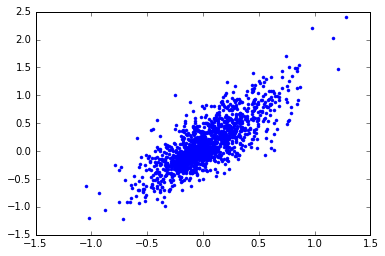

In [69]:
plt.plot(LS_HE_median, CD_HE_median, '.');

In [70]:
ratio_matrix = np.array([LS_HE_median, UC_HE_median, CD_HE_median])
ratio_matrix[:,:4]

array([[-0.42351641,        -inf,        -inf, -0.67503472],
       [-0.00365176,         nan,        -inf,         inf],
       [-0.21846872,        -inf,        -inf,         inf]])

In [71]:
ratio_matrix_finite = ratio_matrix[:,np.all(np.isfinite(ratio_matrix), axis=0)]

In [72]:
ratio_matrix_cov = np.cov(ratio_matrix_finite)
w, v = np.linalg.eig(ratio_matrix_cov)

In [74]:
w

array([ 0.24282503,  0.0208382 ,  0.07495465])

In [75]:
np.max(w)/np.min(w)

11.652880940699854